In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Xtrain=[]
Xtest=[]
ytrain=[]
ytest=[]
for i in range(0,61):
    d=str(i+1)+'/'
    imglist=os.listdir(d)
    l=len(imglist)
    for j in range(l):
        im=cv2.imread(d+imglist[j],)
        if j==0 or j==l-1:
            Xtest.append(im)
            ytest.append(i)
        else:
            Xtrain.append(im)
            ytrain.append(i)

Xtrain=np.array(Xtrain)
Xtest=np.array(Xtest)
ytrain=np.array(ytrain)
ytest=np.array(ytest)

Xtrain=Xtrain/255
Xtest=Xtest/255

Xtrain.shape

(427, 100, 100, 3)

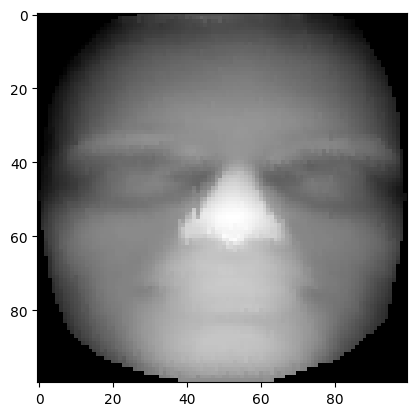

In [5]:
plt.imshow(Xtrain[426])

In [6]:
import tensorflow as tf
from tensorflow.keras import Sequential
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.layers import Input,Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.applications import DenseNet201

In [16]:
base_model=DenseNet201(weights='imagenet',include_top=False,input_tensor=Input(shape=(100,100,3)))

In [17]:
for layer in base_model.layers[:-7]:
    layer.trainable=False

In [18]:
model=Sequential()

model.add(base_model)

model.add(Flatten())

model.add(Dense(250,activation='relu'))

model.add(Dense(61,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 3, 3, 1920)        18321984  
                                                                 
 flatten_2 (Flatten)         (None, 17280)             0         
                                                                 
 dense_4 (Dense)             (None, 250)               4320250   
                                                                 
 dense_5 (Dense)             (None, 61)                15311     
                                                                 
Total params: 22657545 (86.43 MB)
Trainable params: 4618185 (17.62 MB)
Non-trainable params: 18039360 (68.81 MB)
_________________________________________________________________


In [19]:
model.fit(Xtrain,ytrain,epochs=10,validation_data=(Xtest,ytest))

Epoch 1/10
14/14 [==============================] - 45s 2s/step - loss: 6.0244 - accuracy: 0.1077 - val_loss: 3.2249 - val_accuracy: 0.3279
Epoch 2/10
14/14 [==============================] - 26s 2s/step - loss: 2.4217 - accuracy: 0.4145 - val_loss: 3.0853 - val_accuracy: 0.3852
Epoch 3/10
14/14 [==============================] - 27s 2s/step - loss: 1.3972 - accuracy: 0.6557 - val_loss: 2.2314 - val_accuracy: 0.5492
Epoch 4/10
14/14 [==============================] - 27s 2s/step - loss: 0.6675 - accuracy: 0.8454 - val_loss: 1.6577 - val_accuracy: 0.6393
Epoch 5/10
14/14 [==============================] - 27s 2s/step - loss: 0.2452 - accuracy: 0.9578 - val_loss: 1.4159 - val_accuracy: 0.7377
Epoch 6/10
14/14 [==============================] - 28s 2s/step - loss: 0.0832 - accuracy: 0.9953 - val_loss: 1.1957 - val_accuracy: 0.7623
Epoch 7/10
14/14 [==============================] - 27s 2s/step - loss: 0.0371 - accuracy: 1.0000 - val_loss: 1.0719 - val_accuracy: 0.7951
Epoch 8/10
14/14 [==

In [20]:
yprob=model.predict(Xtest)
yprob.shape

4/4 [==============================] - 11s 1s/step


(122, 61)

In [21]:
ypred=yprob.argmax(axis=1)
ypred.shape

(122,)

In [22]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.50      0.67         2
           2       0.50      1.00      0.67         2
           3       0.00      0.00      0.00         2
           4       0.67      1.00      0.80         2
           5       0.67      1.00      0.80         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         2
           8       1.00      0.50      0.67         2
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       1.00      1.00      1.00         2
          12       1.00      0.50      0.67         2
          13       0.33      0.50      0.40         2
          14       0.40      1.00      0.57         2
          15       1.00      0.50      0.67         2
          16       0.67      1.00      0.80         2
          17       1.00    

C:\Users\Animesh Dutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Animesh Dutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Animesh Dutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

[]

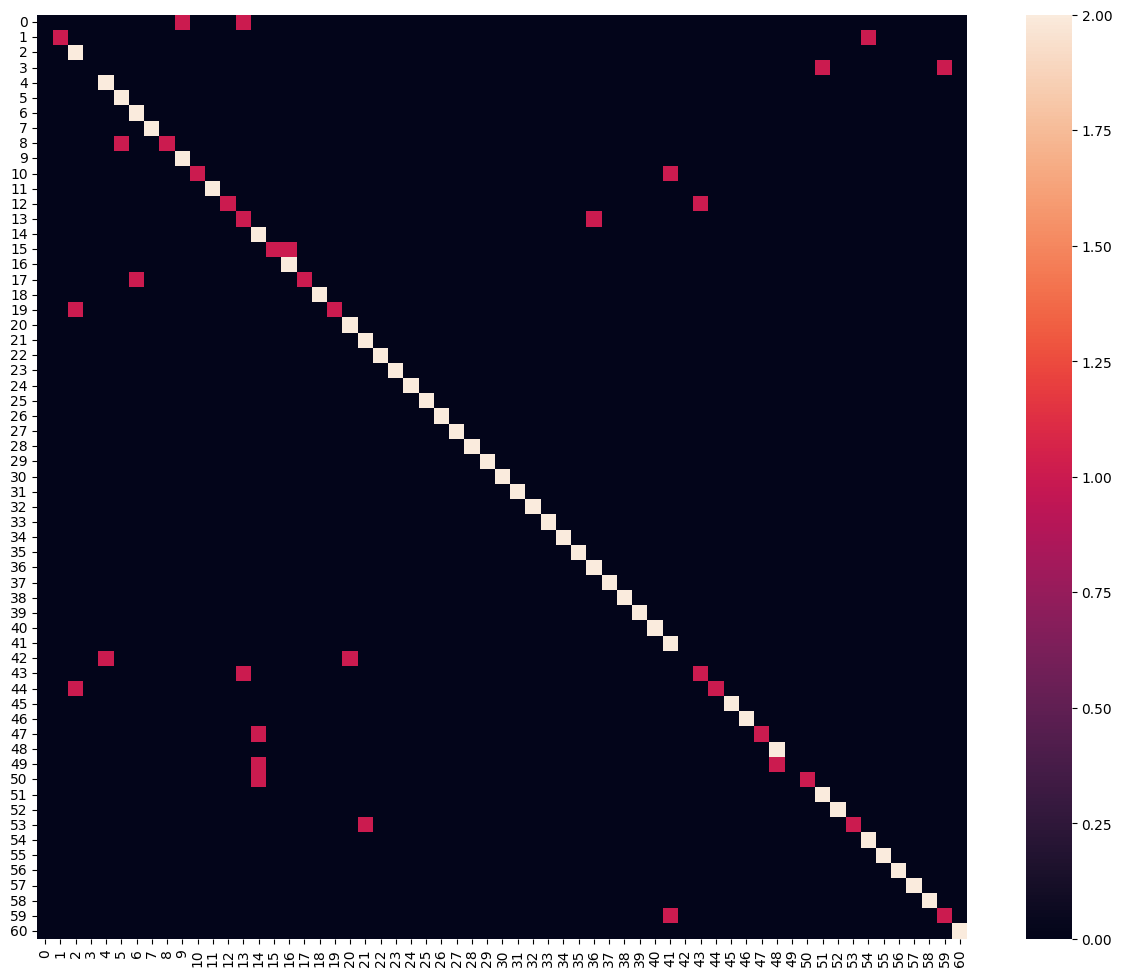

In [23]:
conm=confusion_matrix(ytest,ypred)
plt.figure(figsize=(15,12))
sns.heatmap(data=conm)
plt.plot()